# Proving Universality

In [3]:
from qiskit import *
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram

## 1. Introduction

「コンピュータが実行できる全てのことを実行する」、とはどういうことか？ これは、世間の人々がコンピュータが何であるかをよく理解する前に、アランチューリングが取り組んだ質問でした。

私たちの古典的なコンピューター、特に標準的なデジタルコンピューターに対してこの質問をするためには、すべての画面、スピーカー、および大層な入力デバイスを取り除く必要があります。あとに残るのは、入力ビット文字列を出力ビット文字列に変換するマシンだけです。デバイスがこのような変換を実行でき、任意の入力セットを受け取り、それらを任意に選択された出力セットに変換する場合、それを"universal"と呼びます。

これらのデバイスの普遍性の要件はかなり合理的であることがわかりました。 "The atoms of computation"で加算を実行するために必要なゲートも、可能な計算を実装するのに十分です。実際、十分な量で組み合わせると、従来のNANDゲートで十分です。

私たちの現在のコンピューターは理論的にすべてを行うことができますが、一部のタスクは実際にはリソースを多く使いすぎてしまいます。追加方法の研究では、必要なリソースが問題のサイズに比例して変化することがわかりました。たとえば、数字の桁数を2倍にすると、必要な小規模な加算の数が2倍になります。

他の多くの問題では、必要なリソースは入力サイズに応じて指数関数的に増加します。 因数分解は顕著な例です。 最近の研究では、320桁の数値を分解するにはCPU年(1ギガループのリファレンスマシン1年間フル稼働)かかりました。 それほど大きくない数値であったとしても、それに対処するのに十分なコンピューティングリソースは世界中にありません。ただし、同じ数値をはるかに妥当な時間内にスマートフォンで追加または乗算することはできます。

量子コンピューターは、根本的に異なる方法で普遍性を実現することにより、これらの問題を軽減します。 これまで見てきたように、量子コンピューティングの変数は標準的なコンピューターの変数と同等ではありません。 前のセクションで使用したようなゲートは、標準的なコンピューターのゲートで可能なものを超えています。 このため、他の方法では解決不可能な問題を解く方法を見つけることができます。

## 2. Defining Universality

それでは、量子コンピュータの普遍性をどのように定義するのでしょうか？これは、前述の定義を反映した方法で行うことができます。デジタルコンピューターが入力ビット文字列のセットを出力ビット文字列のセットに変換するのと同じように、ユニタリー演算は直交入力状態のセットを直交出力状態に変換します。

特別なケースとして、これらの状態は、量子形式で表現されたビット文字列を記述できます。ユニタリーを実現できれば、デジタルコンピューターと同じように普遍性を実現できます。

別の特殊なケースは、入力と出力の状態が実際の物理システムを表す可能性があることです。ユニタリーは時間の進化に対応します。適切なエルミート行列を使用して指数形式で表現すると、その行列はハミルトニアンに対応します。したがって、任意のユニタリーを達成することは、任意の時間発展をシミュレーションし、任意のハミルトニアンの効果を設計することに対応します。これはまた、古典的なコンピュータでは実用的ではない重要な問題ですが、量子コンピュータの自然な応用です。

量子コンピューターの普遍性は、これだけです。任意の数のキュービットで任意のユニタリーを実現する機能です。

## 3.Proving Universality

古典的なコンピューターに関しては、この大きな仕事を扱いやすい大きさに分割する必要があります。 これを実現するための基本的なゲートのセットを見つける必要があります。 後で見るように、前のセクションのシングルおよび2キュービットゲートで十分です。

ユニタリーを実装したいとします。

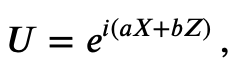

しかし、

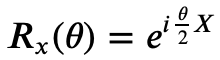

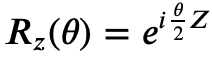

この2つのゲートしかありません。この問題を解くには"Euler angles(オイラー角)"を使うのがベストでしょう。でも、今回は違う方法を考えてみましょう。

Uの指数関数のエルミート行列は、単にRx(θ)及びRz(θ)回転のエルミート行列の和です。これは、問題を解決するための素朴なアプローチを示唆しています。Rz(2b)の後にRx(2a)を適用することができます。しかし、残念なことに可換でない行列を累乗しているため、このアプローチは機能しません。

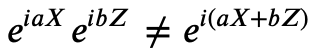

ただし、次のように修正すれば、使うことができます。

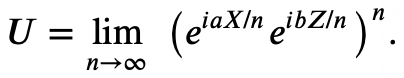

ここでは、Uをnという小さなピースに分けます。すると、各ピースについて、次のように近似することができます。

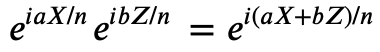

この近似の誤差は、1/(n^2)とスケーリングされます。nピースを組み合わせると、エラーが1/nにスケールするtarget unitaryの近似値が得られます。従って、ピースの数を増やすだけで、必要なだけUに近づけることができます。target unitaryのさらに正確なバージョンを取得するために、シーケンスを作成する他の方法も可能です。

この方法の利点はあ、単一のqubitだけでなく、複雑なケースでも使用できることです。
例えば、単一性を考えます。

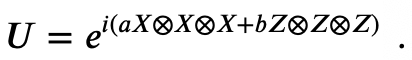

以下のユニタリを単一のqubitと2つのCNOTゲートから作る方法は既に知っていますよね

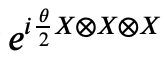

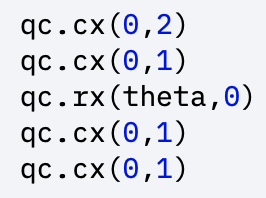

いくつかのアダマールゲートを使うことで、もう片方のユニタリも同じように作れます。

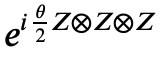

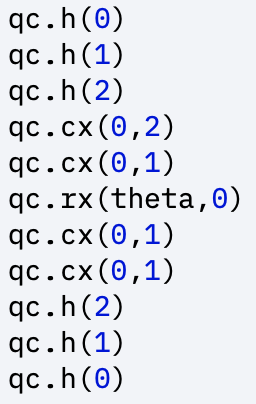

これにより、新たな3qubitの小さなピースUを再現できます。

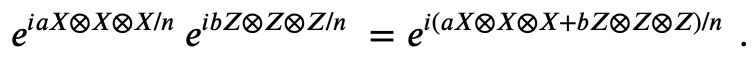

この方法は、qubitの数、及びシミュレーションが必要な項の数を増やしても機能し続けます。近似が正確であることを保証するために注意が必要ですが、これは妥当なリソースを使用することで行うことができます。シミュレーションに項を追加したり、必要な精度を高めたりするには、メソッドの複雑さを多項式で増やすだけで済みます。

この形式の方法は、Hがパウリのテンソル積の和として表現できる任意のユニタリー U=e^iHを再現できます。以前に全ての行列が、この方法で表現できることを示したので、これは全てのユニタリーを再現できることを示すのに十分です。他の方法が実際にはより良いかもしれませんが、この章から取り除くべき概念は、Qiskitにある基本的な操作のみを使用して、全てのマルチキュービットユニタリを再現する方法があることです。量子普遍性が実現できます！

ここまでは、Rx、H、及びゲートを使用して普遍性を実現できることを確認しましたが、ユニバーサル量子ゲートには様々なセットがあります。例えば、IBMQX2プロセッサによって提供される基本的なゲートを見ると、次のようになります。

In [7]:
from qiskit import IBMQ
IBMQ.load_account()
ibmqx2 = IBMQ.get_provider('ibm-q').get_backend('ibmqx2')
ibmqx2.configuration().basis_gates

['u1', 'u2', 'u3', 'cx', 'id']

ユニタリーを再現するのに十分な基本ゲートU1、U2、U3、CX及びIdを提供していることがわかります。他のタイプの量子コンピュータには、"two-qubit Ising-gate"などの異なるネイティブゲートがありますが、ここでは説明しません。現時点で知っておくべきことは、1組のユニバーサルゲートを使用して作成したアルゴリズムは、どのユニバーサル量子コンピュータでも実行できるということです。